# Concours "végétalisons la ville" de Paris

<br><br>
<div>
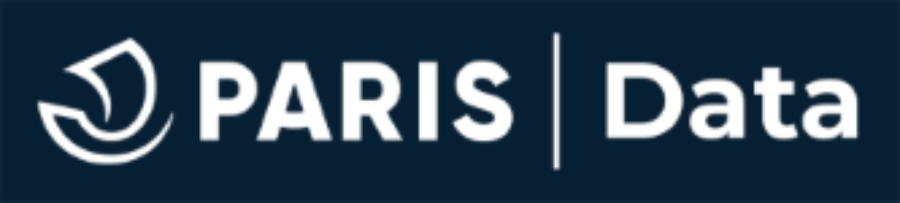
</div>
<br><br>

Dans ce challenge, nous allons réaliser une analyse exploratoire avec un jeu de données (source=<a href="https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86844,2.30945&basemap=jawg.streets">opendata.paris.fr</a> ) portant sur les arbres de la ville de Paris.<br>
L'analyse exploratoire permettra par la suite de contribuer à une optimisation des tournées pour l'entretien des arbres de la ville.<br>
<br>
<br>
> "Eh oui, moins de tournées égale moins de trajets, et plus d’arbres entretenus".

<br>
<br>


# Sommaire
<br>
<ol style="font-size:18px;">
    <li><a href="#Création-de-l'environnement">Création de l'environnement</a></li>
    <ol style="font-size:15px;">
        <li><a href="#Comment-l'utiliser">Comment l'utiliser</a></li>
        <li><a href="#Ajouter-l'environnement-au-jupyter-notebook">Ajouter l'environnement au jupyter notebook</a></li>
    </ol><br>
    <li><a href="#Présentation-générale-du-jeu-de-données">Présentation générale du jeu de données</a></li>
    <ol style="font-size:15px;">
        <li><a href="#Importation-des-librairies">Importation des librairies</a></li>
        <li><a href="#Importation-du-fichier">Importation du fichier</a></li>
        <li><a href="#Analyse-Contenu-du-fichier">Analyse Contenu du fichier</a></li>
        <li><a href="#Analyse-des-données-uniques">Analyse des données uniques</a></li>
        <li><a href="#Analyse-des-données-manquantes">Analyse des données manquantes</a></li>
        <li><a href="#Analyse-des-doublons">Analyse des doublons</a></li>
    </ol><br>
    <li><a href="#Analyse-des-données-statistiques">Analyse des données statistiques</a></li>
    <ol style="font-size:15px;">
        <li><a href="#Analyse-statistique-univariée">Analyse statistique univariée</a></li>
        <li><a href="#Analyse-des-aberrations">Analyse des aberrations</a></li>
        <li><a href="#Analyse-des-données-(statistique-multivariée)">Analyse des données (statistique multivariée)</a></li>
    </ol><br>
    <li><a href="#Nettoyage-du-jeu-de-données">Nettoyage du jeu de données</a></li><br>
    <li><a href="#Synthèse-analyse-de-données">Synthèse analyse de données</a></li>
</ol><br><br>

# Création de l'environnement 

Création de l'environnement avec "Conda".

## Comment l'utiliser

Pour créer l'environnement : <br>
`conda env create --file environment.yaml` <br>

Activer l'environnement: <br>
`conda activate projet2`<br>

Sortir de l'environnement : <br>
`conda deactivate projet2`

Supprimer l'environnement : <br>
`conda env remove --name projet2` <br>

Pour créer le fichier d'environnement  : <br>
`conda env export > environment.yaml` <br>

## Ajouter l'environnement au jupyter notebook

`python -m ipykernel install --user --name=projet2`


# Présentation générale du jeu de données

Dans cette section, nous allons importer puis étudier le contenu du fichier plat.<br>
<br>
Cette partie nous servira à mieux comprendre la structure du fichier et les données de celui-ci.<br>
Grâce à cette analyse rapide, nous pourrons faire une analyse plus approfondie de son contenu (analyse statistique, aberration, etc...)

## Importation des librairies

On importe toutes les librairies nécessaire à l'exécution du code

In [71]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import branca
import folium
from folium.plugins import MarkerCluster

## Importation du fichier

On commence par récupérer le fichier plat et on le stock dans une dataframe.

In [72]:
# importation du fichier plat vers un dataframe
data = pd.read_csv("./data/p2-arbres-fr.csv",encoding="utf-8",sep=";")
print("Dimensionnalitée du DataFrame: ", data.shape)
# visualtion du dataframe (5 premières lignes)
data.head()


Dimensionnalitée du DataFrame:  (200137, 18)


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


On remarque que le fichier contient un total de **200137 lignes et 18 colonnes**.


## Analyse Contenu du fichier

Nous allons maintenant regarder le contenu du fichier dans sa globalité afin de mieux le comprendre (type de données, et compréhension générale).

In [73]:
# information sur les données
print("Info globale de notre data frame :\n")
data.info()

Info globale de notre data frame :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-

Cette remontée d'information nous permet de connaître le type des colonnes, le nombre de valeurs non-vide(*Non-Null*) et le nom des colonnes.<br>
On remarque que la colonne **numero** semble être **vide**.
<br><br>
Avant, tout petit rappel sur les types :
<ul>
    <li>int64 = Nombre entier </li>
    <li>float64 = Nombre à virgule flottante</li>
    <li>bool = Valeur binaire (0/1 OU Vrai/Faux)</li>
    <li>object = Texte ou autre valeur mixte (texte + numériques)</li>
</ul>
<br>
Grâce aux noms des colonnes et aux informations recueillies on peut en déduire le rôle de chacun et leurs types : 

<ul>
    <li>id = <b>identification de la ligne (int)</b></li>
    <li>type_emplacement = <b style="color: red">à définir</b><b> (object)</b></li>
    <li>domanialite = <b>type de domaine, lieux (object)</b></li>
    <li>arrondissement =<b> arrondissement de Paris (object)</b></li>
    <li>complement_addresse = <b style="color: red">à définir</b><b> (object)</b></li>
    <li>lieu = <b>adresse exacte (object)</b></li>
    <li>id_emplacement = <b>identification de l'emplacement (object)</b> </li>
    <li>libelle_francais = <b>nom français de l'arbre (object)</b></li>
    <li>genre = <b>genre de l'arbre (object)</b></li>
    <li>espece = <b>espèce de l'arbre (object)</b></li>
    <li>variete = <b style="color: red">a définir</b><b> (object)</b></li>
    <li>circonference_cm = <b>circonférence de l'arbre (en cm) (int)</b></li>
    <li>hauteur_m = <b>hauteur de l'arbre (en m) (int)</b></li>
    <li>stade_developpement = <b style="color: red">à définir</b><b> (object)</b></li>
    <li>remarquable = <b style="color: red">à définir</b><b> (float)</b></li>
    <li>geo_point_2d_a = <b>géolocalisation latitude (float)</b></li>
    <li>geo_point_2d_b = <b>géolocalisation longitude (float)</b></li>
</ul>


Comme nous connaissons le type des données on peut maintenant faire une analyse descriptive des données sur les valeurs numériques puis non numériques : 

<ul>
    <li>Pour les valeurs <b>numériques</b> :</li>
    <ul>
        <li>Nombre de valeurs</li>
        <li>Moyenne</li>
        <li>Écart-type</li>
        <li>Quartile</li>
        <li>Valeur min</li>
        <li>Valeur max</li>
    </ul>
    <li>Pour les valeurs <b>non numériques</b> : </li>    
    <ul>
        <li>Nombre de valeurs</li>
        <li>Nombre de valeurs uniques</li>
        <li>Valeur la plus fréquente</li>
        <li>Fréquence de la valeur la plus fréquente</li>
    </ul>
</ul>


In [74]:
# Colonne définit comme numérique
columns_to_see=["id","circonference_cm","hauteur_m","remarquable","geo_point_2d_a","geo_point_2d_b"]
data[[col for col in columns_to_see]].describe(include='all').apply(lambda s: s.apply('{0:.5f}'.format))

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.00000,200137.00000,200137.00000,137039.00000,200137.00000,200137.00000
mean,387202.68231,83.38048,13.11051,0.00134,48.85449,2.34821
std,545603.24236,673.19021,1971.21739,0.03662,0.03023,0.05122
min,99874.00000,0.00000,0.00000,0.00000,48.74229,2.21024
25%,155927.00000,30.00000,5.00000,0.00000,48.83502,2.30753
50%,221078.00000,70.00000,8.00000,0.00000,48.85416,2.35110
75%,274102.00000,115.00000,12.00000,0.00000,48.87645,2.38684
max,2024745.00000,250255.00000,881818.00000,1.00000,48.91148,2.46976


Cette description nous indique plusieurs choses, on voit ici que **l'id commence à 99.874,0 et termine à 2.024.745,0 pour un total de 200.137,0 valeurs**.<br><br>
Pour la circonférence et la hauteur on voit que les **valeurs min sont 0 et les valeurs max sont très élevés**, cela ne semble pas être possible, de même pour **l'écart-type (std)** qui indique un chiffre **bien supérieur à la moyenne et au quartile 0,75** , **une analyse d'aberration** semble ici nécessaire.<br><br>
Pour remarquable on peut penser ici que les valeurs sont autour de 0 et 1 et que plus de **75% des valeurs sont égales à 0**.<br><br>
Pour les géolocalisations on voit des valeurs pour "a" autour de 48 et "b" 2, comme nous sommes sur un jeu de données des arbres de la ville de Paris on peut savoir que **"geo_point_2d_a" correspond à la longitude et "geo_point_2d_b" correspond à la latitude**.

In [75]:
# Colonne non définit comme numérique
columns_to_see=["type_emplacement","domanialite","arrondissement","complement_addresse","lieu","id_emplacement","libelle_francais","genre","espece","variete","stade_developpement"]
data[[col for col in columns_to_see]].describe(include='all')

,type_emplacement,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,stade_developpement
count,200137,200136,200137,30902,200137,200137,198640,200121,198385,36777,132932
unique,1,9,25,3795,6921,69040,192,175,539,436,4
top,Arbre,Alignement,PARIS 15E ARRDT,SN°,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',A
freq,200137,104949,17151,557,2995,1324,42508,42591,36409,4538,64438


Cette description des valeurs non numériques nous donne des informations intéressantes, on peut tout de suite voir, par exemple, que le type d'emplacement ne contient que une valeur "Arbre" sur toutes les lignes.<br>
Pour les domanialités, on voit que **50% environ des valeurs sont des "Alignement"**.<br> 
<br>
Grâce à ces tableaux, nous avons un bon aperçu du jeu de données global (valeurs numériques et non numériques).

## Analyse des données uniques

Nous avons identifié la plupart des données, on va faire un focus sur les valeurs qu'il nous reste à définir. Pour ça, on regarde les valeurs que prennent chaque donnée.<br>
On commence par identifier les colonnes qu'on ne comprend pas encore avant d'analyser les autres données.

In [76]:
# on cherche toutes les valeurs uniques pour savoir si cette colonne comprend une autre valeur que "Arbre"
data.type_emplacement.unique()

array(['Arbre'], dtype=object)

Pour le type d'emplacement **toutes les valeurs sont égales à "Arbre"**.<br>Cette valeur indique certainement l'entité/objet présent (ici forcément un arbre).

In [77]:
# On regarde les valeurs que prend complement adresse
data[data.complement_addresse.notna()].complement_addresse.unique()

array(['c 12', '12-36', '12-35', ..., 'au n.14', 'F2bis', '40face'],
      dtype=object)

Pour complement_addresse on retrouve des compléments d'adresses, qui peuvent correspondre à **des emplacements, des numéros d'adresse complémentaire ou des indications**.

In [78]:
# On regarde les valeurs que prend la colonne "variete" (10 premières valeurs) pour comprendre la donnée
data.variete.unique()[:10]

array([nan, "Atropunicea'", "Euchlora'", "Schwedleri'", "Pissardii'",
       "Pallida'", 'n. sp.', "Chanticleer'", "Purpureum'", "Italica'"],
      dtype=object)

Pour variete on retrouve les différentes variétés d'arbre, on remarque également que l'**apostrophe** est ajoutée **à la fin** de chaque nom de variétés. <br>
On peut également voir une valeur qui indique **"n. sp."**, on peut en déduire le terme **"non spécifié"**.

In [79]:
# On recommence avec stade_developpement comme pour variete
data.stade_developpement.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

Pour stade_developpemnet on retrouve 4 valeurs, **A, J, JA et M**.<br>
En regardant sur le site opendata.paris on comprend que :
<ul>
    <li>J  = Jeune (arbre)</li>
    <li>JA = Jeune (arbre) Adulte</li>
    <li>A  = Adulte</li>
    <li>M  = Mature</li>
</ul>

In [80]:
# on recherche les valeurs uniques de la colonne remarquable
data.remarquable.unique()

array([ 0., nan,  1.])

Pour remarquable, on voit 2 valeurs possibles qui sont 0 ou 1 en float. On peut donc considérer que c'est une valeur **boolean**.<br>
Désigne donc les arbres avec des spécificités particulières ("Remarquable").

In [81]:
# toujours pareil mais avec domanialite
data.domanialite.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

On peut voir pour les domanialités que la syntaxe change entre **capitalize** et **uppper_case**

In [82]:
data.arrondissement.unique()

array(['PARIS 7E ARRDT', 'PARIS 17E ARRDT', 'PARIS 16E ARRDT',
       'PARIS 4E ARRDT', 'PARIS 13E ARRDT', 'PARIS 12E ARRDT',
       'PARIS 19E ARRDT', 'PARIS 14E ARRDT', 'PARIS 15E ARRDT',
       'PARIS 3E ARRDT', 'PARIS 20E ARRDT', 'PARIS 18E ARRDT',
       'PARIS 6E ARRDT', 'PARIS 11E ARRDT', 'PARIS 1ER ARRDT',
       'PARIS 2E ARRDT', 'PARIS 5E ARRDT', 'VAL-DE-MARNE',
       'SEINE-SAINT-DENIS', 'HAUTS-DE-SEINE', 'PARIS 9E ARRDT',
       'PARIS 10E ARRDT', 'PARIS 8E ARRDT', 'BOIS DE BOULOGNE',
       'BOIS DE VINCENNES'], dtype=object)

On retrouve pour les arrondissements les 20 arrondissements de Paris + SEINE-SAINT-DENIS, BOIS DE VINCENNES, VAL-DE-MARNE, HAUT-DE-SEINE et BOIS DE BOULOGNE.

### Compréhension des données :
Pour résumer : 
<ul>
    <li>id = <b>identification de la ligne (int)</b></li>
    <li>type_emplacement = <b>désigne l'entité ici "Arbre"</b><b> (object)</b></li>
    <li>domanialite = <b>type de domaine, lieux</b><b> (object)</b></li>
    <li>arrondissement =<b>arrondissement de Paris</b><b> (object)</b></li>
    <li>complement_addresse = <b>complément d'adresse</b><b> (object)</b></li>
    <li>lieu = <b>adresse exacte</b><b> (object)</b></li>
    <li>id_emplacement = <b>identification de l'emplacement</b><b> (object)</b> </li>
    <li>libelle_francais = <b>nom français de l'arbre</b><b> (object)</b></li>
    <li>genre = <b>genre de l'arbre</b><b> (object)</b></li>
    <li>espece = <b>espèce de l'arbre</b><b> (object)</b></li>
    <li>variete = <b>variété de l'arbre</b><b> (object)</b></li>
    <li>circonference_cm = <b>circonférence de l'arbre (en cm) (int)</b></li>
    <li>hauteur_m = <b>hauteur de l'arbre (en m) (int)</b></li>
    <li>stade_developpement = <b>maturité de l'arbre (object)</b></li>
    <li>remarquable = <b>arbre remarquable (boolean)</b></li>
    <li>geo_point_2d_a = <b>géolocalisation latitude (float)</b></li>
    <li>geo_point_2d_b = <b>géolocalisation longitude (float)</b></li>
</ul>

Maintenant, nous avons une meilleure compréhension et maîtrise des données.

In [83]:
# Toutes les valeurs uniques
data_unique = pd.DataFrame(data.apply(lambda col : col.unique()),columns=["unique_value"])
# Le nombre de valeurs uniques
data_unique["unique_count"] = data.apply(lambda col : col.nunique())
# Le nombre de valeurs non vides
data_unique["row_not_na"]=data.notna().astype(int).agg("sum")
# Le pourcentage de valeurs uniques
data_unique["unique_rate"]=((data_unique.unique_count / data_unique.row_not_na) * 100).round(4)

data_unique.sort_values(by='unique_rate',ascending=False)

,unique_value,unique_count,row_not_na,unique_rate
id,"[99874, 99875, 99876, 99877, 99878, 99879, 998...",200137,200137,100.0000
geo_point_2d_b,"[2.3209621099, 2.3210314229, 2.321060566, 2.32...",200114,200137,99.9885
geo_point_2d_a,"[48.8576199541, 48.8576560697, 48.8577050069, ...",200107,200137,99.9850
id_emplacement,"[19, 20, 21, 22, 000G0037, 000G0036, 000G0035,...",69040,200137,34.4964
complement_addresse,"[nan, c 12, 12-36, 12-35, face 64 Manin, 19-02...",3795,30902,12.2808
lieu,"[MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E, PA...",6921,200137,3.4581
variete,"[nan, Atropunicea', Euchlora', Schwedleri', Pi...",436,36777,1.1855
espece,"[hippocastanum, baccata, negundo, daniellii, x...",539,198385,0.2717
circonference_cm,"[20, 65, 90, 60, 38, 37, 260, 145, 135, 15, 30...",531,200137,0.2653
libelle_francais,"[Marronnier, If, Erable, Arbre à miel, Platane...",192,198640,0.0967


### Analyse globale des données uniques


Ce tableau indique les valeurs uniques que prennent chaque colonne, ainsi que le nombre de valeurs uniques et le pourcentage sur le total de nombres de ligne non vide.<br>
La colonne **id** est **complète** et possède **que des valeurs uniques**. Pour la **géolocalisation** on voit que **des valeurs sont doublées**. (soit même longitude ou même latitude)<br>
<br>
Nous avons déjà fait le détail de la plupart des valeurs ci-dessus.<br>
On peut rappeler que la **domanialité** a des **syntaxes différentes**. On remarque également que l'**id d'emplacement** a des syntaxes différentes. **(ex : 000G0037 ou 19 )**

## Analyse des données manquantes

On va maintenant passer à l'analyse des données manquantes, d'abord au global puis en détail.

In [84]:
# indication des valeurs manquantes
print("Pourcentage des valeurs manquantes :")
(data.isna().mean() * 100).sort_values(ascending=True)

Pourcentage des valeurs manquantes :


id                       0.000000
hauteur_m                0.000000
circonference_cm         0.000000
geo_point_2d_a           0.000000
id_emplacement           0.000000
lieu                     0.000000
geo_point_2d_b           0.000000
arrondissement           0.000000
type_emplacement         0.000000
domanialite              0.000500
genre                    0.007995
libelle_francais         0.747988
espece                   0.875400
remarquable             31.527404
stade_developpement     33.579498
variete                 81.624088
complement_addresse     84.559577
numero                 100.000000
dtype: float64

On peut voir ici que la colonne **numero** ne contient **aucune valeur**.<br>
Les colonnes complètes sont :
<ul>
    <li>id</li>
    <li>type_emplacement</li>
    <li>domanialite *(il manque une valeur)*</li>
    <li>arrondissement</li>
    <li>lieu</li>
    <li>id_emplacement</li>
    <li>circonference_cm</li>
    <li>hauteur_m</li>
    <li>geo_point_2d_a</li>
    <li>geo_point_2d_b</li>
</ul>

In [85]:
data[data.domanialite.isna()]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35,4,JA,0.0,48.849547,2.41419


Étant la seule donnée vide pour cette colonne, et toutes les autres données semblent pertinente, on peut penser que cette valeur vide est tout simplement un **oublie/erreur**.<br>
Il peut donc être nécessaire de supprimer cette ligne si la domanialité est une variable importante de notre analyse.

In [86]:
columns_to_see = ["genre","domanialite","espece","variete","genre","espece","circonference_cm","hauteur_m","stade_developpement"]
# valeur des colonnes quand la colonne genre est vide.
data[data.genre.isna()][[col for col in columns_to_see]]

,genre,domanialite,espece,variete,genre,espece,circonference_cm,hauteur_m,stade_developpement
195404,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195409,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195410,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195475,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195476,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195487,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195496,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195497,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195499,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195502,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN


On voit qu'il y certainement une corrélation quand la colonne **genre est vide** toutes les valeurs qui sont associées à une identification d'un arbre sont **NaN** ( **genre, espece, variete, espece, circonference_cm, hauteur_m et stade_developpement** ) et **domanialite** sa valeur prend **"Jardin"**.<br><br>
**On peut supposer que ce sont des arbres privés qui ne sont pas encore renseignés**.

>Attention cependant à ne pas faire la corrélation inverse, c'est-à-dire que si c'est un arbre privé ou que les données ne sont pas renseigner alors la colonne genre est forcement vide

**Il est donc préférable de supprimer toutes ces lignes pour une future analyse.**

In [87]:
data[data.espece.isna()].head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
1725,101858,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,D0030002,Pommier à fleurs,Malus,NaN,Aldenhamensis',40,4,NaN,NaN,48.880684,2.387536
2323,102582,Arbre,Jardin,PARIS 16E ARRDT,82 à 90,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,408032,Cornouiller,Cornus,NaN,Eddie's White Wonder',25,3,JA,0.0,48.872087,2.277040
2733,103215,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0167,Cerisier à fleurs,Prunus,NaN,Accolade',32,0,NaN,NaN,48.890072,2.316124
2742,103224,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0188,Cerisier à fleurs,Prunus,NaN,Accolade',60,0,NaN,NaN,48.890239,2.315838
3944,104827,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,SQUARE RENE LE GALL,10255,Pommier à fleurs,Malus,NaN,Golden Hornet',40,4,NaN,NaN,48.832854,2.350704


Ici **aucune corrélation** particulière pour la colonne "espece" à vide.

 ## Analyse des doublons
 
 Dans cette partie nous allons analyser plus en détail chaque donnée pour identifier les doublons possibles.

In [88]:
data_duplicate = pd.DataFrame(data.apply(lambda col : col.dropna().duplicated().agg("sum")),columns=["duplicate_value_count"])
# Le nombre de valeur non vide
data_duplicate["row_not_na"]=data.notna().astype(int).agg("sum")

data_duplicate["duplicate_rate"]=((data_duplicate.duplicate_value_count / data_duplicate.row_not_na) * 100).round(3)

data_duplicate["values_uniques"]=data.apply(lambda col : col.unique())

data_duplicate["unique_count"] = data.apply(lambda col : col.nunique())

data_duplicate.sort_values(by=["duplicate_rate",],ascending=False)

,duplicate_value_count,row_not_na,duplicate_rate,values_uniques,unique_count
type_emplacement,200136,200137,100.000,[Arbre],1
remarquable,137037,137039,99.999,"[0.0, nan, 1.0]",2
stade_developpement,132928,132932,99.997,"[nan, A, J, M, JA]",4
domanialite,200127,200136,99.996,"[Jardin, Alignement, DJS, DFPE, CIMETIERE, DAS...",9
arrondissement,200112,200137,99.988,"[PARIS 7E ARRDT, PARIS 17E ARRDT, PARIS 16E AR...",25
hauteur_m,199994,200137,99.929,"[5, 8, 10, 0, 17, 14, 3, 6, 4, 11, 7, 15, 9, 1...",143
genre,199946,200121,99.913,"[Aesculus, Taxus, Acer, Tetradium, Platanus, S...",175
libelle_francais,198448,198640,99.903,"[Marronnier, If, Erable, Arbre à miel, Platane...",192
circonference_cm,199606,200137,99.735,"[20, 65, 90, 60, 38, 37, 260, 145, 135, 15, 30...",531
espece,197846,198385,99.728,"[hippocastanum, baccata, negundo, daniellii, x...",539


Ce tableau nous donne un premier aperçu des valeurs dupliquées dans ce jeu de données.<br>
On peut s'intéresser aux valeurs ayant peu de duplication comme la **géolocalisation** identique qui n'est pas possible, 
on peut ensuite voir si l'**id_emplacement** a des valeurs ressemblantes et identiques (format de texte) pour des éventuels **doublons sur des syntaxes différentes**.

Pour les doublons de la géolocalisation, on va vérifier des géolocalisations précises identiques(longitude ET latitude), car il est possible d'avoir la même latitude mais pas la même longitude et donc un emplacement différent.<br>
Pour ça, on va donc rechercher les **emplacements identiques en latitude ET longitude**.

In [89]:
# duplicated geo _a ET _b
same_geo = data[data.duplicated(['geo_point_2d_a','geo_point_2d_b'],keep=False)]
# list colonnes à voir
columns_to_see = ["domanialite","id_emplacement","lieu","genre","variete","libelle_francais","geo_point_2d_a","geo_point_2d_b","stade_developpement"]
# reindexation pour une meilleur visibilité.
index = [i for i in range(1,len(same_geo)+1)]
same_geo.index=index
# affichage
same_geo.sort_values(by=["geo_point_2d_a"])[[col for col in columns_to_see]]

,domanialite,id_emplacement,lieu,genre,variete,libelle_francais,geo_point_2d_a,geo_point_2d_b,stade_developpement
10,Alignement,402030,ROUTE DAUPHINE,Tilia,NaN,Tilleul,48.829912,2.439665,NaN
9,Alignement,402029,ROUTE DAUPHINE,Tilia,NaN,Tilleul,48.829912,2.439665,NaN
17,Jardin,190042,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Populus,Italica',Peuplier,48.836416,2.446277,A
16,Jardin,190042,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Populus,NaN,Peuplier,48.836416,2.446277,NaN
20,Jardin,210035,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Malus,NaN,Pommier à fleurs,48.836862,2.446518,NaN
13,Jardin,210034,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Fagus,Rotundifolia',Hêtre,48.836862,2.446518,JA
1,Jardin,5,JARDIN PARTAGE BEL-AIR,Ailanthus,NaN,Ailante,48.838318,2.406610,NaN
2,Jardin,6,JARDIN PARTAGE BEL-AIR,Ailanthus,NaN,Ailante,48.838318,2.406610,NaN
15,Jardin,20069,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Cedrus,NaN,Cèdre,48.838539,2.439350,A
22,Jardin,20129,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Cedrus,NaN,Cèdre,48.838539,2.439350,NaN


Ce tableau nous donne plusieurs indications sur la duplication des géolocalisations, on remarque 4 symptômes :<br><br>

- Ligne 9 et 10 (index) par exemple, on remarque des **arbres similaire** (libelle_francais, genre, variete) sur les **même géoposition mais à des id_emplacement qui se différencie souvent de 1**.<br><div style="color: #FB6F49;">On peut penser que ce sont des arbres identiques et très proches ou une erreur de saisie.</div>
<br><br>
- Ligne 16 et 17 (index) par exemple, on remarque **2 saisies identiques avec quelques valeurs qui diffèrent** (ici variete et stade_developpement).<br><div style="color: #FB6F49;">On peut penser que c'est un oublie ou une mise à jour.</div>
<br><br>
- Ligne 20 et 13 (index) par exemple, on remarque **2 arbres différents à la même géolocalisation**.<br><div style="color: #FB6F49;">On peut penser que c'est un nouvel arbre qui a été planté (on peut soit prendre en compte le plus haut ID soit le stade développement pour connaître le nouvel arbre).</div>
<br><br>
- Ligne 5 et 8 (index) par exemple, on remarque **2 arbres identiques** sur le type et la géolocalisation **mais à des id_emplacement et domanialite différent**.<br><div  style="color: #FB6F49;">On peut penser que c'est un changement de domanialité, on remarque une certaine corrélation entre la domanialité et le lieu (VOIE DF19 = VOIE DF/19) et en ne prenant que les derniers digits on remarque qu'il y a une corrélation : ...003 = 3, ..002 = 2.</div>

In [90]:
columns_to_see = ["domanialite","arrondissement","lieu","id_emplacement","libelle_francais","geo_point_2d_a","geo_point_2d_b"]
data[data.id_emplacement.duplicated(keep=False)].sort_values(by="id_emplacement")[[col for col in columns_to_see]].head(10)

,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,geo_point_2d_a,geo_point_2d_b
2268,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0001,Pin,48.833118,2.299095
8946,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0001,Fevier,48.889081,2.315414
9688,Jardin,PARIS 14E ARRDT,PARC MONTSOURIS,000A0001,Hêtre,48.824114,2.338959
8947,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0002,Fevier,48.889140,2.315472
2269,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0002,Pin,48.833096,2.299237
2270,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0003,Charme-Houblon,48.833044,2.299204
8413,Jardin,PARIS 14E ARRDT,PARC MONTSOURIS,000A0003,Hêtre,48.823903,2.339368
8948,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0003,Fevier,48.889201,2.315531
8949,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0004,Fevier,48.889261,2.315585
2271,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0004,Pin,48.833083,2.299095


On peut voir ici que l'id_emplacement n'est pas un id unique à chaque emplacement ou arbre. On retrouve le même id_emplacement dans différents arrondissements/lieux.<br><br>
La question qui peut maintenant se poser est comment les données sont générées ?

Nous pouvons analyser la répartition des doublons, puis voir s'il est judicieux et facile de convertir toutes les valeurs au format numérique.

In [91]:
count = data.id_emplacement.value_counts()
modalite = count.index
test = pd.DataFrame(modalite,columns=["id_emplacement"])
test["count"] = count.values
test["frequency"]=(test["count"] / len(data.id_emplacement.notna()))*100
test = test.sort_values(by="frequency",ascending=False)
print("Le nombre de catégories est de {} valeurs pour un total de {} valeurs.".
      format(len(test),test["count"].sum()))
test.head(10)

Le nombre de catégories est de 69040 valeurs pour un total de 200137 valeurs.


,id_emplacement,count,frequency
0,101001,1324,0.661547
1,101002,1241,0.620075
2,101003,1128,0.563614
3,202001,1032,0.515647
4,101004,1020,0.509651
5,202002,964,0.481670
6,101005,906,0.452690
7,202003,879,0.439199
8,101006,829,0.414216
9,202004,802,0.400726


On peut voir qu'il y a un **grand nombre de catégories d'id_emplacement**, et les 10 valeurs les plus récurrentes sont des valeurs numériques.

In [92]:
count = data[data.id_emplacement.apply(lambda x : x.isdigit())==False].id_emplacement.value_counts()
modalite = count.index
notdigit = pd.DataFrame(modalite,columns=["id_emplacement"])
notdigit["count"] = count.values
notdigit["frequency"]=(notdigit["count"] / len(data.id_emplacement.notna()))*100
notdigit = notdigit.sort_values(by="frequency",ascending=False)
print("Le nombre de catégories ne pouvant être transformé en valeur numérique est de {} valeurs pour un total de {} valeurs.".
      format(len(notdigit),notdigit["count"].sum()))
print("Le pourcentage de valeurs non numérique est de {}% .".
      format( (( notdigit["count"].sum() / len(data.id_emplacement.notna()) )*100).round(3) ))
notdigit.head(10)

Le nombre de catégories ne pouvant être transformé en valeur numérique est de 35441 valeurs pour un total de 40216 valeurs.
Le pourcentage de valeurs non numérique est de 20.094% .


,id_emplacement,count,frequency
0,D00000005001,12,0.005996
2,D00000010001,12,0.005996
3,D00000007001,12,0.005996
1,D00000013001,12,0.005996
4,D00000002001,11,0.005496
5,D00000003001,11,0.005496
6,D00000004001,11,0.005496
7,D00000012001,10,0.004997
8,D00000001002,10,0.004997
9,A14000003001,10,0.004997


On voit ici que la moitié **des catégories de valeur** sont en partis **non numériques**, mais que cela ne représente **que 20% du total des valeurs**.<br><br>
Il peut être intéressant de se renseigner comment est saisie l'id_emplacement pour comprendre le rôle des valeurs non numérique dans cette colonne.<br>
À première vue cette colonne ne semble pas bloquante et peut être classifiée comme **valeur qualitative nominale** pour identifier un arbre grâce à plusieurs autres facteurs (domanialite, lieu, arrondissement, géolocalisation).

 # Analyse des données statistiques
 
Pour ça, nous allons procéder en suivant cet ordre :
<ul>
    <li>Analyse statistique univariée</li>
    <li>Analyse des abération</li>
    <li>Analyse statistique multivariée</li>
</ul>

**Cette analyse se basera principalement sur des informations d'emplacement des arbres, de leurs tailles ou stade de développement qui sont des informations importantes pour la gestion de l'entretien des arbres.**

## Analyse statistique univariée

On va commencer par une analyse statistique de chaque colonne intéressante.

Création du style des graphiques.

In [93]:
plt.style.use('seaborn-whitegrid')

SIZE_FONT = 15

plt.rc('font', size=SIZE_FONT) # taille de texte par défaut
plt.rc('axes', titlesize=SIZE_FONT) # taille des titres des axes
plt.rc('axes', labelsize=SIZE_FONT) # taille des labels des axes
plt.rc('xtick', labelsize=SIZE_FONT) # taille des ticks des ascisses
plt.rc('ytick', labelsize=SIZE_FONT) # taille des ticks des ordonnées
plt.rc('legend', fontsize=SIZE_FONT) # taille de la légende

dims_fig = (12,7)

### Valeurs manquantes
On peut commencer par analyser les données manquantes.

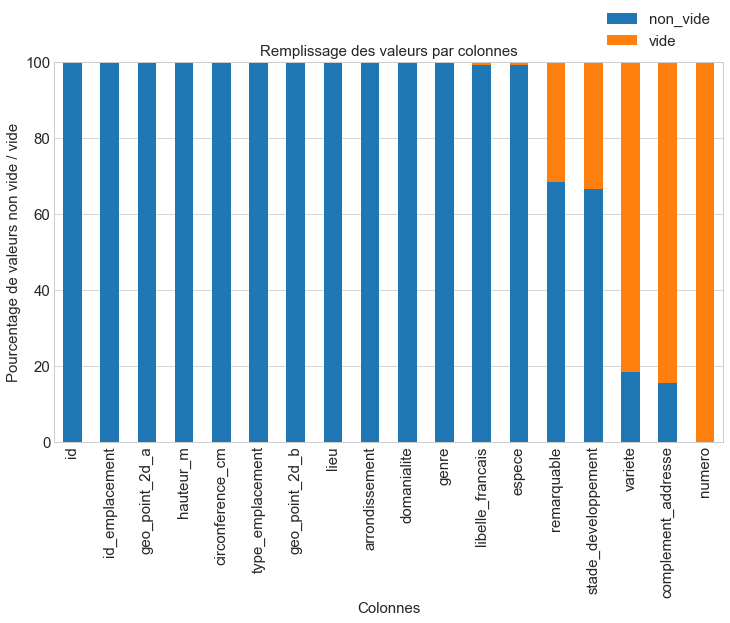

In [94]:
numberData = pd.DataFrame(data.apply(lambda col : ((col.notna().astype(int).sum()/ len(data))*100).round(3)),columns=["non_vide"])
numberData["vide"] = (data.isna().mean() * 100)
numberData = numberData.sort_values(by="non_vide",ascending=False)
numberData.plot.bar(figsize=dims_fig,stacked=True)


plt.title("Remplissage des valeurs par colonnes")
plt.ylabel("Pourcentage de valeurs non vide / vide")
plt.xlabel("Colonnes")

plt.legend(loc="lower right",bbox_to_anchor=(1, 1))

Comme décrit dans la phase de présentation, certaines colonnes ont beaucoup de valeur vide et la colonne numéro ne contient aucune valeur.

On peut également présenter les données vides par une heatmap qui nous indiquera la position des lignes vides.

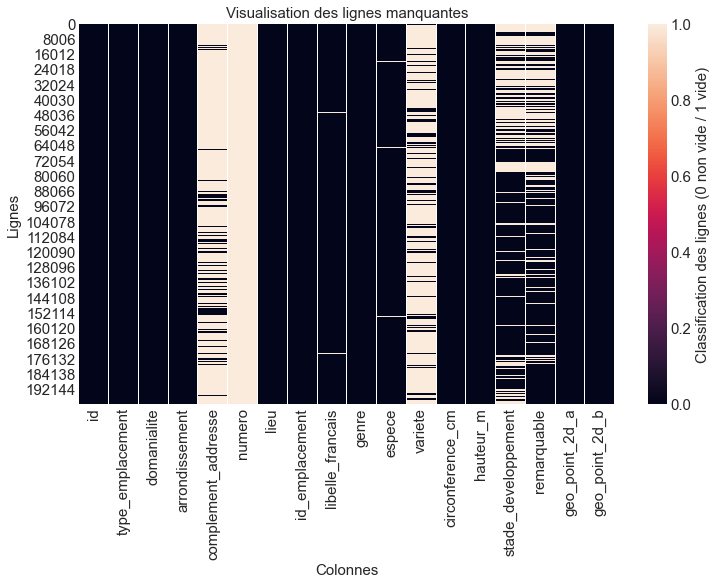

In [95]:
fig = plt.figure(figsize=dims_fig)
ax = sns.heatmap(data.isna())
ax.set_xlabel("Colonnes")
ax.set_ylabel("Lignes")
ax.set_title('Visualisation des lignes manquantes')
ax.collections[0].colorbar.set_label("Classification des lignes (0 non vide / 1 vide)")
plt.show()

La répartition des lignes manquantes n'indique pas de problème/pattern à première vue, mise à part la colonne numéro qui est complètement vide.

### Arrondissements

Analysons la colonne arrondissement pour connaître sa distribution statistique.

Les arrondissements sont répartis de la façon suivante (%) :
PARIS 15E ARRDT      8.570
PARIS 13E ARRDT      8.350
PARIS 16E ARRDT      8.196
PARIS 20E ARRDT      7.665
PARIS 19E ARRDT      6.850
PARIS 12E ARRDT      6.296
SEINE-SAINT-DENIS    5.781
BOIS DE VINCENNES    5.751
PARIS 14E ARRDT      5.696
PARIS 17E ARRDT      5.377
PARIS 18E ARRDT      5.002
PARIS 7E ARRDT       4.306
VAL-DE-MARNE         3.787
PARIS 8E ARRDT       3.620
PARIS 11E ARRDT      2.827
HAUTS-DE-SEINE       2.647
BOIS DE BOULOGNE     1.988
PARIS 10E ARRDT      1.691
PARIS 4E ARRDT       1.369
PARIS 5E ARRDT       1.183
PARIS 6E ARRDT       0.881
PARIS 1ER ARRDT      0.706
PARIS 3E ARRDT       0.604
PARIS 9E ARRDT       0.583
PARIS 2E ARRDT       0.274
Name: arrondissement, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

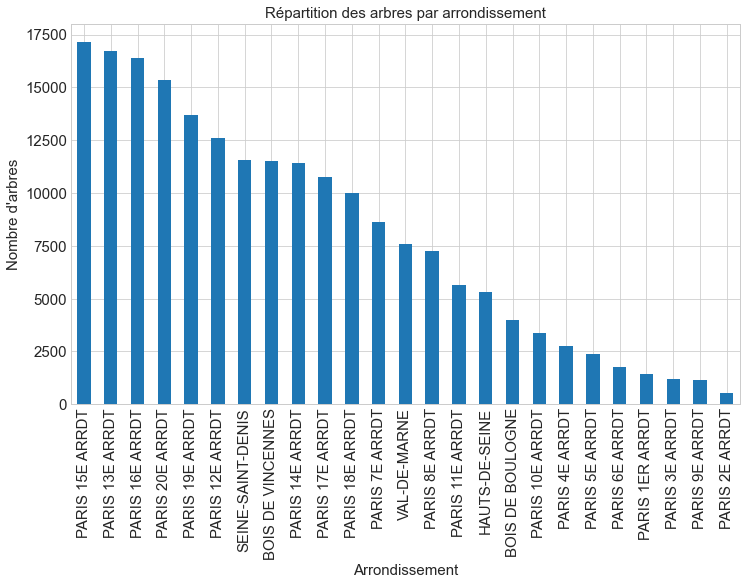

In [96]:
data.arrondissement.value_counts(normalize=False).plot.bar(figsize=dims_fig)
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'arbres")
plt.title("Répartition des arbres par arrondissement")
print("Les arrondissements sont répartis de la façon suivante (%) :\n{}".format((data.arrondissement.value_counts(normalize=True)*100).round(3)))
plt.show

On voit ici une plus forte densité dans certains arrondissements, et presque aucun arbre renseigné pour le 2e arrondissement.<br>
Les arbres ne sont pas répartis équitablement avec une plus forte densité dans certains arrondissements.

### Domanialités

Passons à la colonne Domanialite.<br>
Cette information nous permet de connaître les types de domanialités les plus répandues.

La domanialité est répartie de la façon suivante :
Alignement      52.439
Jardin          23.115
CIMETIERE       15.952
DASCO            3.209
PERIPHERIQUE     2.662
DJS              1.949
DFPE             0.662
DAC              0.010
DASES            0.002
Name: domanialite, dtype: float64


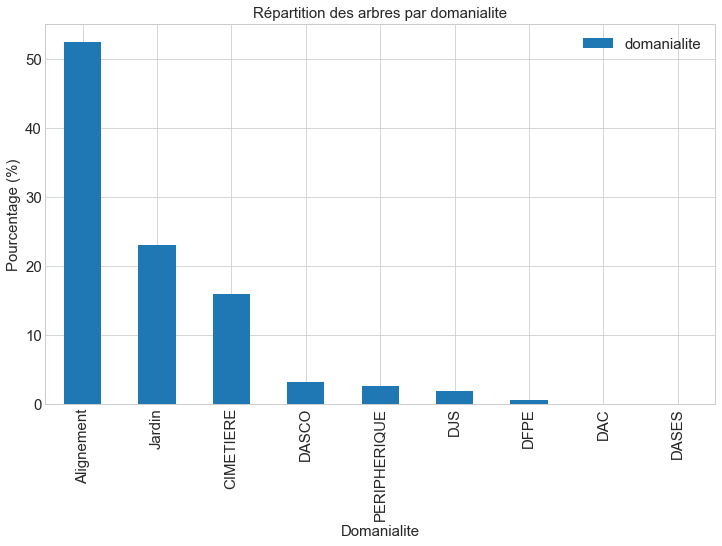

In [97]:
data_domanialite = pd.DataFrame( (data.domanialite.value_counts(normalize=True)*100).round(3) )
data_domanialite.plot.bar(figsize=dims_fig)
plt.xlabel("Domanialite")
plt.ylabel("Pourcentage (%)")
plt.title("Répartition des arbres par domanialite")

print("La domanialité est répartie de la façon suivante :\n{}".format((data.domanialite.value_counts(normalize=True)*100).round(3)))
plt.show()

Ici, on remarque clairement que les 3 domanialités principales sont **l'alignement avec 52%** des arbres puis les **jardins avec 23%** et enfin les **cimetières avec 16%** sois 91% des arbres sur ces 3 domanialités.

### Stade de développement

On va maintenant analyser la répartition des stades de développement des arbres afin de connaître l'état de maturité des arbres.

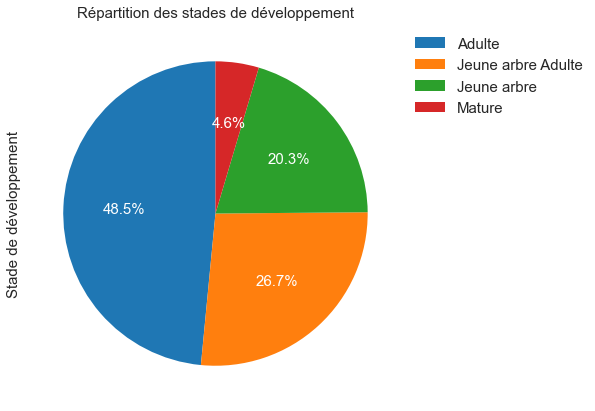

In [98]:
group_name=["Adulte","Jeune arbre Adulte", "Jeune arbre", "Mature"]
#colors = ['#784618', '#85582e', '#916b48', '#6b3705',]
data.stade_developpement.value_counts(normalize=True).plot.pie(figsize=dims_fig,
                                                               autopct='%1.1f%%',
                                                               startangle=90,
                                                               label="Stade de développement",
                                                               #colors=colors,
                                                               textprops=dict(color="w"))

plt.title("Répartition des stades de développement")
plt.legend(labels=group_name,bbox_to_anchor=(1.5, 1))

On voir que la répartition des arbres est environ de **50/50 entre les jeunes arbres (JA/J) et les arbres ancien(A/M)** et qu'il y a très peu d'arbre "Mature" et environ 20% de "Jeune arbre" fraîchement planté.<br>

### Arbre "Remarquable"

>Un arbre "Remarquable" est un arbre qui possède une forme particulière que l'on "remarque" par sa forme originale, ces mensurations ou sa rareté, etc.


In [99]:
data.remarquable.value_counts(normalize=False)

0.0    136855
1.0       184
Name: remarquable, dtype: int64

Ici, on peut voir que la majorité des arbres ne sont pas "Remarquable", ce qui semble logique, on retrouve **seulement 184 arbres "Remarquable" soit 0.13% contre 136.855 arbres soit 99.87% des arbres** (*sur la totalité des lignes non vides pour cette colonne*).

### Hauteur & Circonférence

Pour cela on va regarder par tranche, la première tranche sera les valeurs **possibles**, puis les valeurs **atypiques** et enfin les valeurs **impossibles**.

On va découper ces valeurs de 1 mètre à 25 mètres, qui sont les valeurs moyennes (à maturité) de hauteur des arbres, ensuite de 25m à 116m qui est la taille de l'arbre le plus haut du monde ("Hypérion"), puis les valeurs supérieures à cet arbre.

hauteur_m
(1, 25]          159077
(25, 116]          1305
(116, 881818]        87
Name: hauteur_m, dtype: int64


Text(0, 0.5, "Nombre d'arbres")

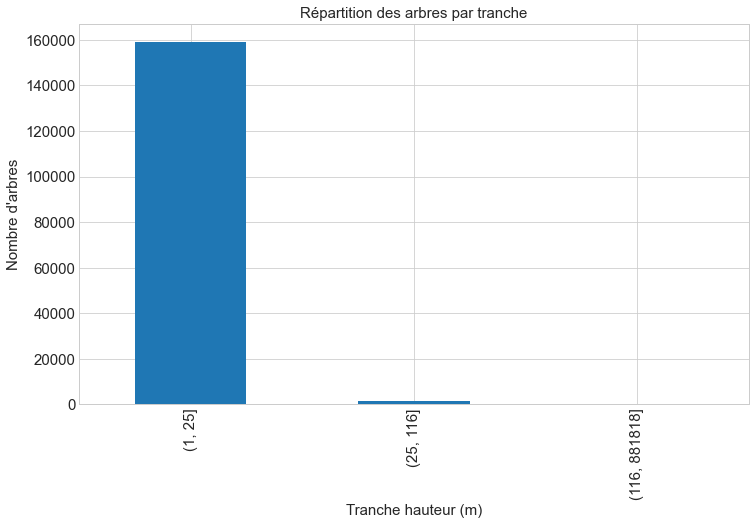

In [100]:
h_cut = pd.cut(data.hauteur_m,[1,25,116,data.hauteur_m.max()])
print(data.groupby(h_cut)["hauteur_m"].count())

data.groupby(h_cut)["hauteur_m"].count().plot.bar(figsize=dims_fig)

plt.title("Répartition des arbres par tranche")
plt.xlabel("Tranche hauteur (m)")
plt.ylabel("Nombre d'arbres")

On voit que la majorité des arbres sont bien dans les normes de mesure courante et que **1300 semblent atypiques**.<br> On voit aussi que **87 valeurs semblent impossibles**.

Pour la circonférence nous allons donc prendre pour la **tranche possible** les valeurs comprises **entre 5 cm et 3 m** de circonférence, les **valeurs atypiques** seront comprises **entre 3m et 34 m** (circonférence du plus gros arbre du monde) et les valeurs aberrantes sont donc les valeurs supérieures à cela.

circonference_cm
(5, 300]          173246
(300, 3400]          904
(3400, 250255]        20
Name: circonference_cm, dtype: int64


Text(0, 0.5, "Nombre d'arbres")

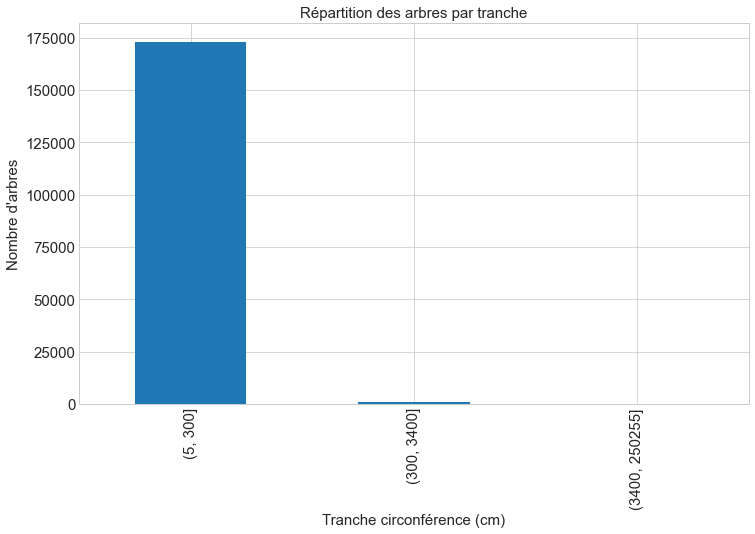

In [101]:
c_cut = pd.cut(data.circonference_cm,[5,300,3400,data.circonference_cm.max()])
print(data.groupby(c_cut)["circonference_cm"].count())

data.groupby(c_cut)["circonference_cm"].count().plot.bar(figsize=dims_fig)

plt.title("Répartition des arbres par tranche")
plt.xlabel("Tranche circonférence (cm)")
plt.ylabel("Nombre d'arbres")

On voit que la majorité des arbres sont bien dans les normes de mesure courante et que **904 semblent atypiques**.<br> On voit aussi que **20 valeurs semblent impossibles**.

Il est encore possible d'analyser plus en profondeur les valeurs atypiques, cette analyse nous donne juste une indication potentielle des valeurs aberrantes et atypiques.

## Analyse des aberrations

Reprenons pour cela le tableau de description effectué au début.

In [102]:
# Description des données de circonférence hauteur et géolocalisation
def highlight_cell(val):
    color = 'red' if (val < 673 + 1 and val > 673 - 1) or (val < 1971 + 1 and val > 1971 -1) or (
        val < 250255 + 1 and val > 250255 - 1) or (val < 881818 + 1 and val > 881818 -1)else 'black'
    return 'color: %s' % color


descr = data[["circonference_cm","hauteur_m","geo_point_2d_a","geo_point_2d_b"]].describe()
descr = descr.style.applymap(highlight_cell)
descr

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,200137.000000,200137.000000
mean,83.380479,13.110509,48.854491,2.348208
std,673.190213,1971.217387,0.030234,0.051220
min,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,48.835021,2.307530
50%,70.000000,8.000000,48.854162,2.351095
75%,115.000000,12.000000,48.876447,2.386838
max,250255.000000,881818.000000,48.911485,2.469759


On remarque que **l'écart-type** de la **ciconference_cm et de la hauteur_m** est **très élevé** par rapport aux valeurs moyennes et la moyenne des valeurs des premières 75%. <br>
On peut supposer qu'il y a des valeurs aberrantes pour ces 2 colonnes.<br>
Pour ce qui est de la géolocalisation des arbres les valeurs semble cohérentes.

In [103]:
#pourcentage de valeur à 0
df_circon_hauteur = data[["circonference_cm","hauteur_m"]]
percentage0 = ((df_circon_hauteur[df_circon_hauteur==0].count() /
                df_circon_hauteur.notna().astype(int).agg("sum"))*100).round(3)

#Nombre de valeur 0 circonférence ET hauteur à 0
circonference_and_hauteur_0 = len(data.loc[(data["circonference_cm"]==0) & (data["hauteur_m"]==0)])
#Nombre de valeur 0 circonférence seulement
circonference_0 = len(data.loc[data["circonference_cm"]==0])
#Nombre de valeur 0 hauteur seulement
hauteur_0 = len(data.loc[data["hauteur_m"]==0])

# Affichage
print("""Pour la colonne \"circonference_cm\" il y a {} lignes etant à 0 et {} pour la colonne \"hauteur\".
Il y a également {} lignes ou les 2 colonnes sont à 0.\n""".
      format(circonference_0,hauteur_0,circonference_and_hauteur_0))

print("Cela représente en pourcentage de lignes à 0: ")

percentage0

Pour la colonne "circonference_cm" il y a 25867 lignes etant à 0 et 39219 pour la colonne "hauteur".
Il y a également 25501 lignes ou les 2 colonnes sont à 0.

Cela représente en pourcentage de lignes à 0: 


circonference_cm    12.925
hauteur_m           19.596
dtype: float64

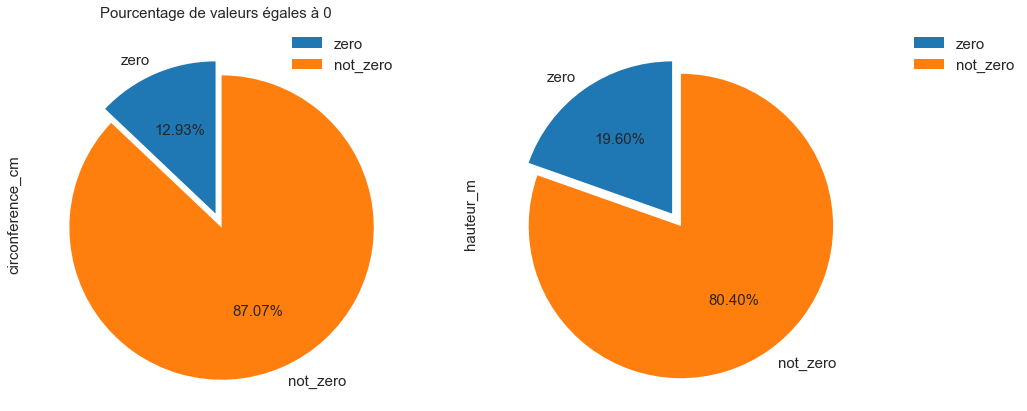

In [134]:
test = pd.DataFrame(data=percentage0.values.reshape(1,2),columns=percentage0.index,index=["zero"])

test.loc["not_zero"]=100-test.loc["zero"]

explode = (0,0.1)
test.plot.pie(subplots=True,
              figsize=(15,10),
              autopct='%1.2f%%',
              startangle=90,
              explode=explode,
              fontsize=15,
              title=["Pourcentage de valeurs égales à 0",""])

plt.legend(bbox_to_anchor=(1.1, 1))



In [105]:
Q1 = data[["circonference_cm","hauteur_m"]].quantile(0.25)
Q3 = data[["circonference_cm","hauteur_m"]].quantile(0.75)
EI = Q3 - Q1

outliers = ((data[["circonference_cm","hauteur_m"]] > (Q3 + 1.5 * EI)) |
                (data[["circonference_cm","hauteur_m"]] < (Q1 - 1.5 * EI)))
print("Le quartile 1 a pour valeur :\n{}\n\nLe quartile 3 a pour valeur :\n{}\n\nEt l\'écart interquartile est de :\n{}\n".
      format(Q1,Q3,EI))
print("On vérifie les outliers : \n",outliers)
print("On considère les outliers toutes les valeurs comprises entre : \n{} \nET \n{} ".format((Q3 + 1.5 * EI),(Q1 - 1.5 * EI)))

Le quartile 1 a pour valeur :
circonference_cm    30.0
hauteur_m            5.0
Name: 0.25, dtype: float64

Le quartile 3 a pour valeur :
circonference_cm    115.0
hauteur_m            12.0
Name: 0.75, dtype: float64

Et l'écart interquartile est de :
circonference_cm    85.0
hauteur_m            7.0
dtype: float64

On vérifie les outliers : 
         circonference_cm  hauteur_m
0                  False      False
1                  False      False
2                  False      False
3                  False      False
4                  False      False
...                  ...        ...
200132             False      False
200133             False      False
200134             False      False
200135             False      False
200136             False      False

[200137 rows x 2 columns]
On considère les outliers toutes les valeurs comprises entre : 
circonference_cm    242.5
hauteur_m            22.5
dtype: float64 
ET 
circonference_cm   -97.5
hauteur_m           -5.5
dtype: fl

Maintenant que nous avons récupéré **les outliers sur la base de multiple de quantile**, on peut comptabiliser et analyser les valeurs aberrantes. <br>
On remarque que les valeurs basses sont dans le négatif, et on sait que le jeu de données ne contient pas de valeurs négatives pour ces colonnes. On va donc simplement chercher les outliers supérieur à 242,5 et 22,5.<br><br>
L'étape juste avant nous avons comptabilisé les valeurs à 0 qui ne sont pas possibles ( donc aberrantes ), il faut donc prendre en considération les 2 informations pour avoir une idée des valeurs aberrantes.

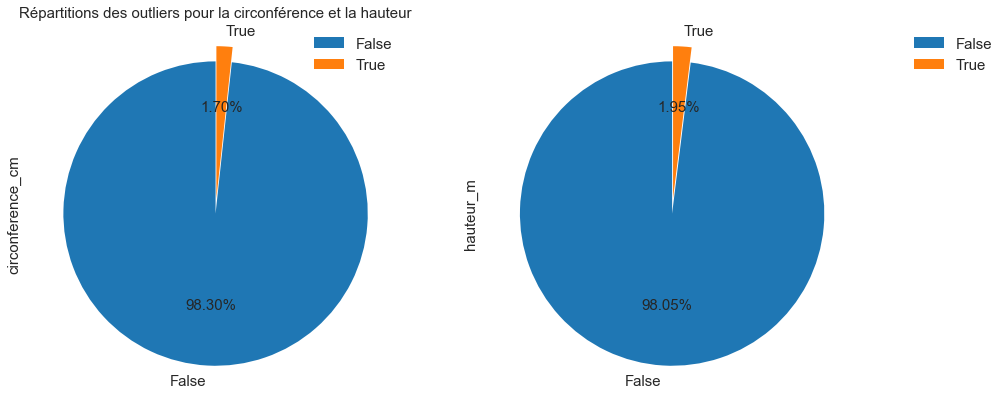

In [106]:
explode = (0,0.1)
fig = outliers.apply(lambda col : col.value_counts()).plot.pie(subplots=True,
                                                         figsize=(15,10),
                                                         autopct='%1.2f%%',
                                                         startangle=90,
                                                         explode=explode,
                                                         fontsize=15,
                                                         title=["Répartitions des outliers pour la circonférence et la hauteur",""])

plt.legend(bbox_to_anchor=(1.1, 1))

On voit ici que **1,7%** des valeurs sont des outliers pour la circonférence et **1,95%** pour la hauteur.

On peut se demander maintenant comment sont répartis les aberrations et s'ils sont atypiques ou vraiment aberrants.<br>
Pour ça, nous avons déjà réalisé une analyse sur des tranches dans l'étape d'analyse univariée qui nous a donné une première indication.

Text(1.1, 10000, 'Aberration possible')

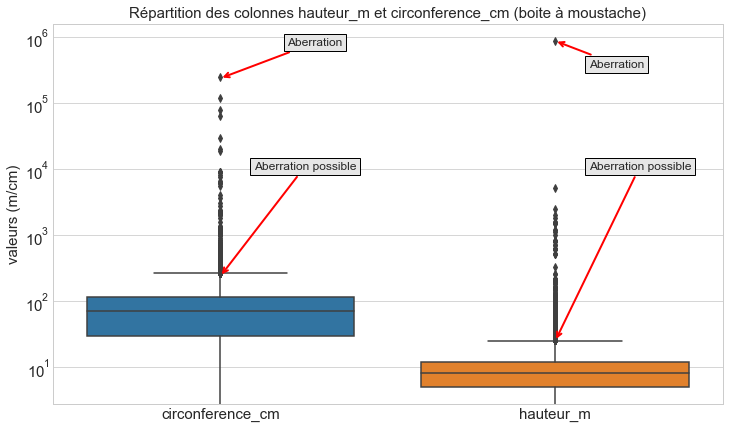

In [135]:
fig= plt.figure(figsize=dims_fig)
ax = sns.boxplot(data=data[['circonference_cm', 'hauteur_m']], orient="v", whis=[0.1,99])
ax.set_yscale('log')
plt.xlabel("")
plt.ylabel("valeurs (m/cm)")
plt.title("Répartition des colonnes hauteur_m et circonference_cm (boite à moustache)")

ax.annotate('Aberration',
            xy=(0,240000),
            xytext=(0.2,750000),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )
ax.annotate('Aberration',
            xy=(1,880000),
            xytext=(1.1,350000),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

ax.annotate('Aberration possible',
            xy=(0,240),
            xytext=(0.1,10000),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

ax.annotate('Aberration possible',
            xy=(1,25),
            xytext=(1.1,10000),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

On remarque clairement des **valeurs aberrantes**, et d'autres valeurs plus proche mais des outliers tout de même.<br>
Faisons un **zoom** en oubliant les valeurs dont nous sommes sûr qu'elles sont aberrantes.<br><br>
On peut maintenant se demander si ces valeurs sont atypiques ou vraiment aberrantes.

#### Focus hauteur :

Text(50, -0.1, 'Aberration possible')

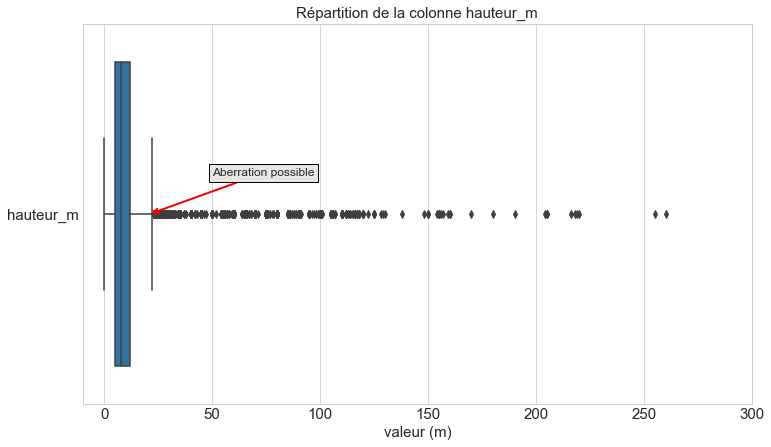

In [108]:
plt.figure(figsize=dims_fig)
ax= sns.boxplot(data=data[["hauteur_m"]], orient="h")
ax.set(xlim=(-10,300))

plt.title("Répartition de la colonne hauteur_m")
plt.xlabel("valeur (m)")
plt.ylabel("")

ax.annotate('Aberration possible',
            xy=(21,0),
            xytext=(50,-0.1),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

#### Focus circonférence :

Text(500, -0.1, 'Aberration possible')

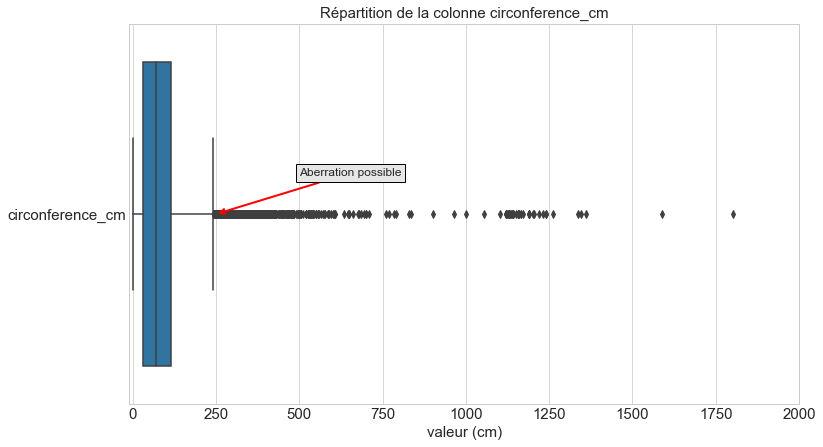

In [109]:
plt.figure(figsize=dims_fig)
ax= sns.boxplot(data=data[["circonference_cm"]], orient="h")
ax.set(xlim=(-10,2000))

plt.title("Répartition de la colonne circonference_cm")
plt.xlabel("valeur (cm)")
plt.ylabel("")

ax.annotate('Aberration possible',
            xy=(250,0),
            xytext=(500,-0.1),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

Sur les valeurs de la **hauteur**, on remarque que les outliers sont assez **regroupés jusqu'à environ 35m**, les valeurs se dispersent ensuite.<br>Pour la **circonférence** on voit que les outliers sont **regroupés jusqu'à environ 600cm**.<br>
<br>**Pour ça, nous allons analyser la dispersion des valeurs plus en détail.**
<br><br> Il peut être intéressant de vérifier au dessus de ces valeurs la cause de ces outliers.

### Analyse de la forme :

Ici, on va analyser l'asymétrie du jeu de données.

In [110]:
data[["circonference_cm", "hauteur_m"]].skew(axis=0, skipna = True)

circonference_cm    298.156614
hauteur_m           447.294132
dtype: float64

On voit ici que les deux valeurs indiquent **une distribution étalée à droite** .<br>Ce résultat est dû aux valeurs aberrantes que l'on trouve en **valeur max** par exemple : <br>
- circonférence : 250255 cm
- hauteur : 881818 m

Text(2000, 5e-05, 'Aberration possible')

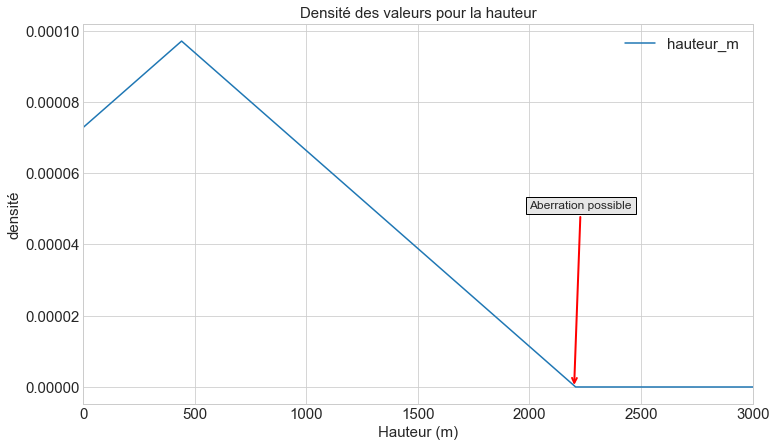

In [136]:
ax= data[["hauteur_m"]].plot(kind="density",figsize=dims_fig)
ax.set(xlim=(0,3000))
plt.title("Densité des valeurs pour la hauteur")
plt.xlabel("Hauteur (m)")
plt.ylabel("densité")

ax.annotate('Aberration possible',
            xy=(2200,0),
            xytext=(2000,0.00005),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

Text(600, 0.002, 'Aberration possible')

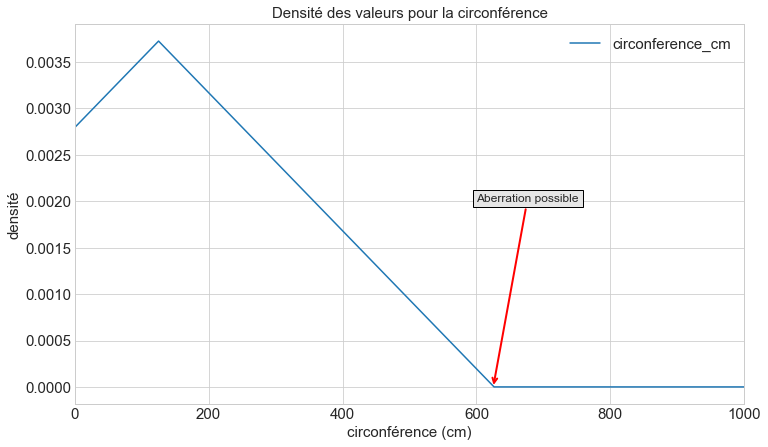

In [137]:
ax= data[["circonference_cm"]].plot(kind="density",figsize=dims_fig)
plt.title("Densité des valeurs pour la circonférence")
plt.xlabel("circonférence (cm)")
plt.ylabel("densité")
ax.set(xlim=(0,1000))

ax.annotate('Aberration possible',
            xy=(625,0),
            xytext=(600,0.0020),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

On voit que la plupart des valeurs se situent entre :
<ul>
    <li><b>0 et 2200 pour la hauteur</b></li>
    <li><b>0 et 625 pour la circonférence</b></li>
</ul>
<br>Ces valeurs semblent bien trop grandes pour la hauteur mais plus réaliste pour la circonférence.<br><br>

**Pour résumer les aberrations sont très certainement au dessus de 35 pour la hauteur et au dessus de 620 pour la circonférence, ainsi que toutes les valeurs à 0.**<br><br>
*Il serait intéressant pour aller plus loin de vérifier les cas des outliers atypiques et vraiment aberrants.*

 ## Analyse des données (statistique multivariée)

L'analyse multivariée va nous permettre de mieux analyser les valeurs en mettant en corrélation les colonnes pour en faire ressortir des informations intéressantes. 

On peut commencer par mettre en corrélation les colonnes avec des variables quantitatives.

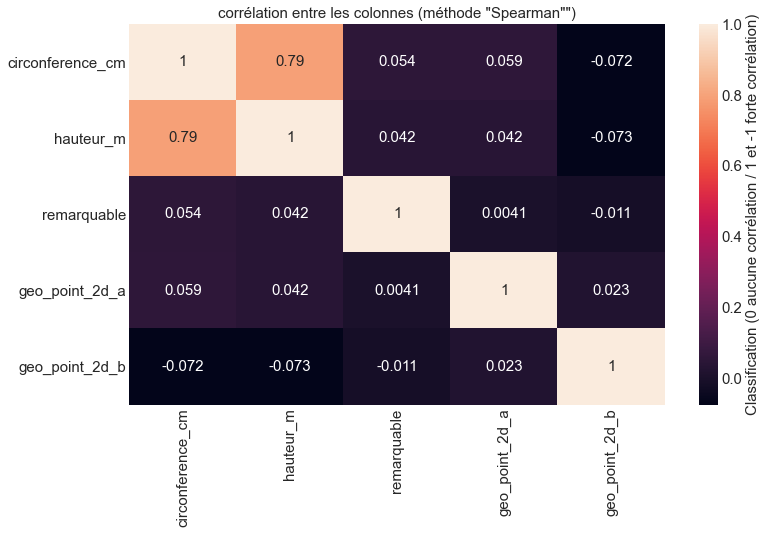

In [113]:
fig = plt.figure(figsize=dims_fig)
ax = sns.heatmap(data[["circonference_cm","hauteur_m","remarquable","geo_point_2d_a","geo_point_2d_b"]].
                 corr(method="spearman"),annot=True)
ax.set_title('corrélation entre les colonnes (méthode \"Spearman\"")')
ax.collections[0].colorbar.set_label("Classification (0 aucune corrélation / 1 et -1 forte corrélation)")
plt.show()
# https://fr.wikipedia.org/wiki/Corrélation_de_Spearman
# la corrélation spearman prend la relation monotone
# c'est à dire des variables qui ont tendance à se deplacer dans la même direction relative mais pas forcement a la même vitesse.
# Pearson = Linéaire / Spearman = monotone <=> linéaire 

On remarque ici que d'après la corrélation de Spearman, la colonne **circonférence et hauteur sont très corrélées**.

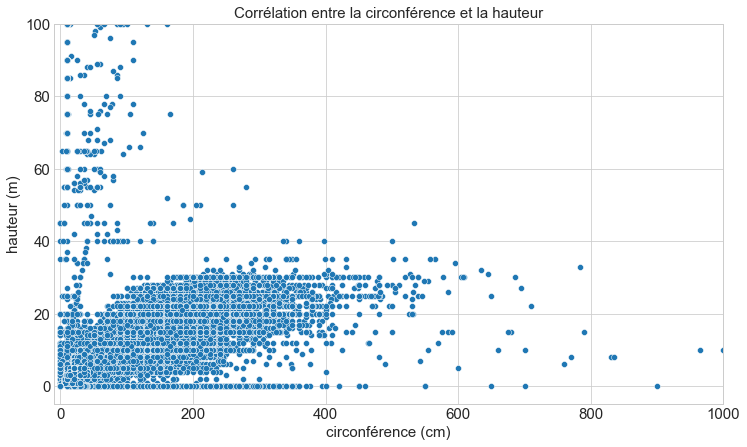

In [114]:
plt.figure(figsize=dims_fig)
ax = sns.scatterplot(data=data,x="circonference_cm",y="hauteur_m")
ax.set(xlim=(-10,1000))
ax.set(ylim=(-5,100))

plt.title("Corrélation entre la circonférence et la hauteur")
plt.xlabel("circonférence (cm)")
plt.ylabel("hauteur (m)")

plt.show()

On voit effectivement que les points se dirigent globalement de façon identique presque de façon linéaire. <br>
On peut voir sur ce graphique que des valeurs semblent défaillantes, on peut voir des arbres très grands mais qui ont une circonférence peu élevée et inversement. 

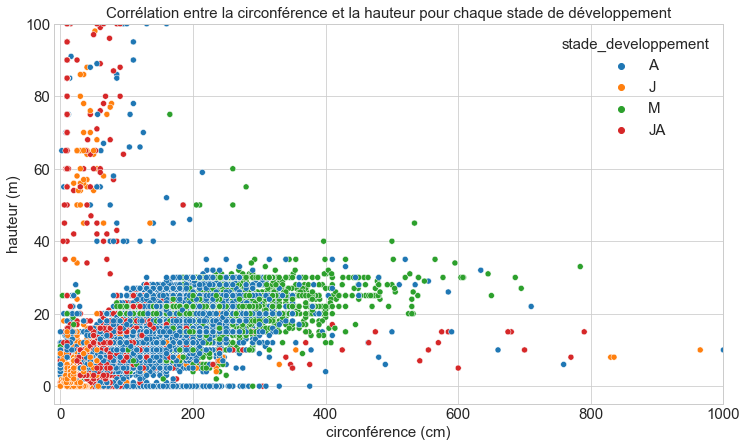

In [115]:
plt.figure(figsize=dims_fig)
ax = sns.scatterplot(data=data,x="circonference_cm",y="hauteur_m",hue="stade_developpement")
ax.set(xlim=(-10,1000))
ax.set(ylim=(-5,100))

plt.title("Corrélation entre la circonférence et la hauteur pour chaque stade de développement")
plt.xlabel("circonférence (cm)")
plt.ylabel("hauteur (m)")

plt.show()

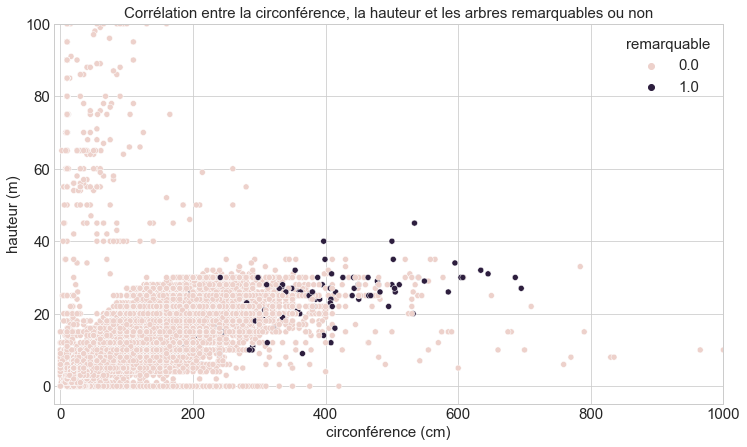

In [116]:
plt.figure(figsize=dims_fig)
ax = sns.scatterplot(data=data,x="circonference_cm",y="hauteur_m",hue="remarquable")
ax.set(xlim=(-10,1000))
ax.set(ylim=(-5,100))
plt.title("Corrélation entre la circonférence, la hauteur et les arbres remarquables ou non")
plt.xlabel("circonférence (cm)")
plt.ylabel("hauteur (m)")
plt.show()

En mettant en relation avec la **colonne stade_developpement** on voit que pour les **valeurs qui semblent défaillantes**, on se retrouve avec **des arbres très grands mais une circonférence faible indiquée comme "Jeune Arbre ou Jeune Arbre Adulte"** ce qui semble incorrect.<br><br>
Pour les arbres **remarquables**, on voit que la **corrélation est forte** et on peut même penser que les arbres "Remarquable" ont **des dimensions globalement plus importantes que les arbres classiques.**

### Remarquable / Stade développement

D'après l'analyse précédente, on peut se demander si le fait que les arbres sont indiqués comme remarquables ne viennent pas du fait que leur stade de développement sont plus élevés...

Text(0, 0.5, "Nombre d'arbres")

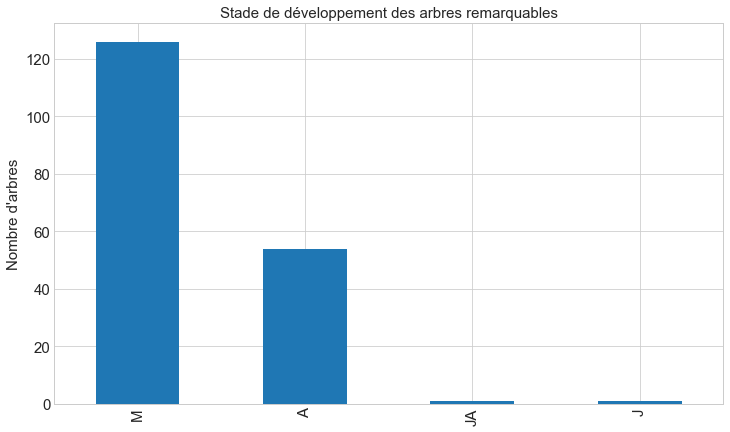

In [117]:
data[data.remarquable==1.].stade_developpement.value_counts().plot.bar(figsize=dims_fig)
plt.title("Stade de développement des arbres remarquables")
plt.xlabel("")
plt.ylabel("Nombre d'arbres")

On peut voir que la quasi-totalité des arbres "Remarquable" sont effectivement des arbres "Adulte" ou "Mature"

Une autre corrélation cette fois, avec des valeurs qualitatives, pour le genre des arbres et l'arrondissement.<br>
Cette analyse permet de connaître la répartition des genres d'arbres par arrondissement, pour analyser par exemple les arbres allergènes.

In [118]:
X = "arrondissement"
Y = "genre"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
# Salix = Saule marsault
# Alnus = L'aulne glutineux
# Betula = Le bouleau pleureur
# Caprinus = Le charme commun
# Fagus = Hêtre commun
alergene_tree = ["Salix","Alnus","Betula","Carpinus","Fagus"] # un exemple de 5 genres d'arbres provoquant des allergies
cont[[col for col in alergene_tree]].fillna(0)

genre,Salix,Alnus,Betula,Carpinus,Fagus
arrondissement,,,,,
BOIS DE BOULOGNE,0.0,0.0,0.0,25.0,0.0
BOIS DE VINCENNES,44.0,17.0,165.0,229.0,287.0
HAUTS-DE-SEINE,0.0,221.0,119.0,0.0,0.0
PARIS 10E ARRDT,0.0,1.0,74.0,189.0,2.0
PARIS 11E ARRDT,1.0,23.0,58.0,59.0,1.0
PARIS 12E ARRDT,66.0,24.0,172.0,203.0,51.0
PARIS 13E ARRDT,34.0,54.0,260.0,408.0,40.0
PARIS 14E ARRDT,3.0,18.0,115.0,96.0,57.0
PARIS 15E ARRDT,77.0,49.0,368.0,294.0,861.0


Text(0, 0.5, "Nombre d'arbres")

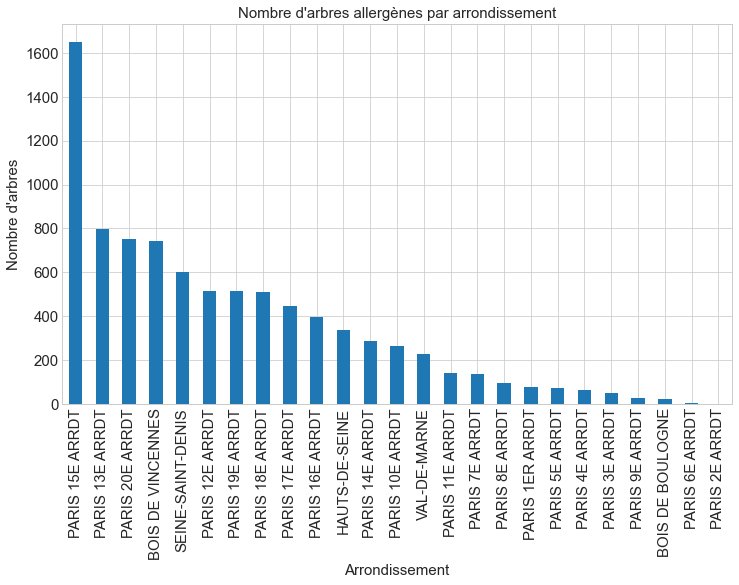

In [138]:
cont[[col for col in alergene_tree]].fillna(0).sum(axis=1).sort_values(ascending=False).plot.bar(figsize=dims_fig)
plt.title("Nombre d'arbres allergènes par arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'arbres")

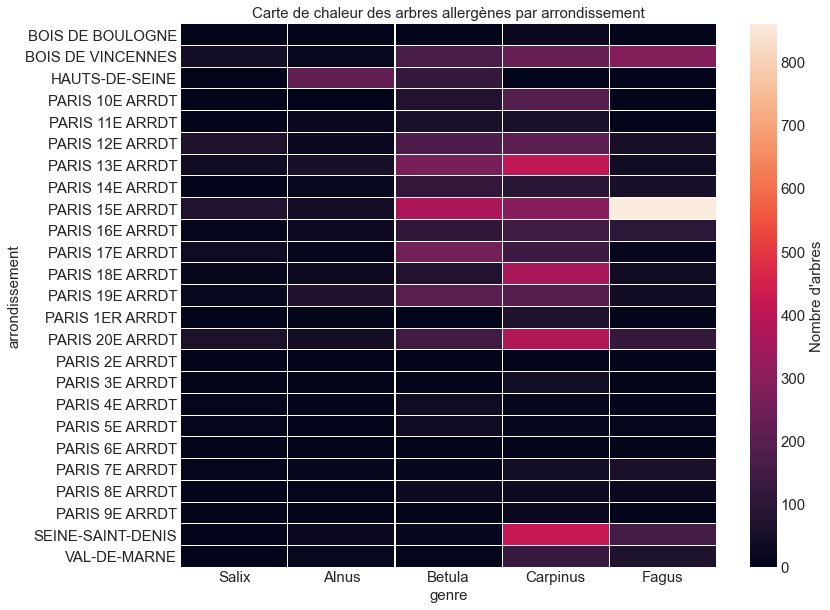

In [133]:
plt.figure(figsize=(12,10))
ax= sns.heatmap(cont[[col for col in alergene_tree]].fillna(0),linewidths=.1)
ax.set_title("Carte de chaleur des arbres allergènes par arrondissement")
ax.collections[0].colorbar.set_label("Nombre d'arbres")
plt.show()

Ces informations sont **importantes pour les personnes allergiques**. Il peut être intéressant de **prendre ce facteur en compte pour l'entretien des arbres** de Paris.

### Latitude / Longitude

Cette corrélation semble évidente, mais elle peut nous indiquer la concentration/emplacement des arbres géographiquement.

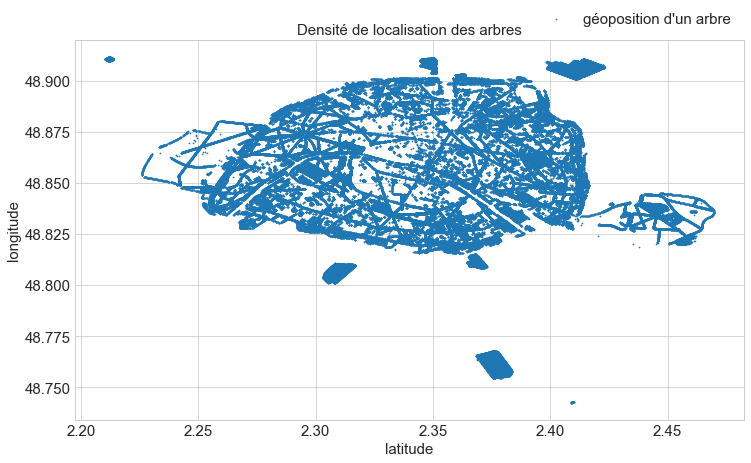

In [121]:
data.plot.scatter(x="geo_point_2d_b",y="geo_point_2d_a",figsize=dims_fig,s=0.5,label="géoposition d'un arbre")

plt.title("Densité de localisation des arbres")
plt.ylabel("longitude")
plt.xlabel("latitude")

plt.legend(loc="lower right",bbox_to_anchor=(1, 1))

Sans carte, il est difficile de se faire une idée précise, on peut cependant voir que globalement les arbres sont très condensés.<br><br>
On peut par exemple regrouper les arbres par arrondissement, et mettre en relation le stade de développement de l'arbre pour connaître le niveau d'entretien nécessaire.

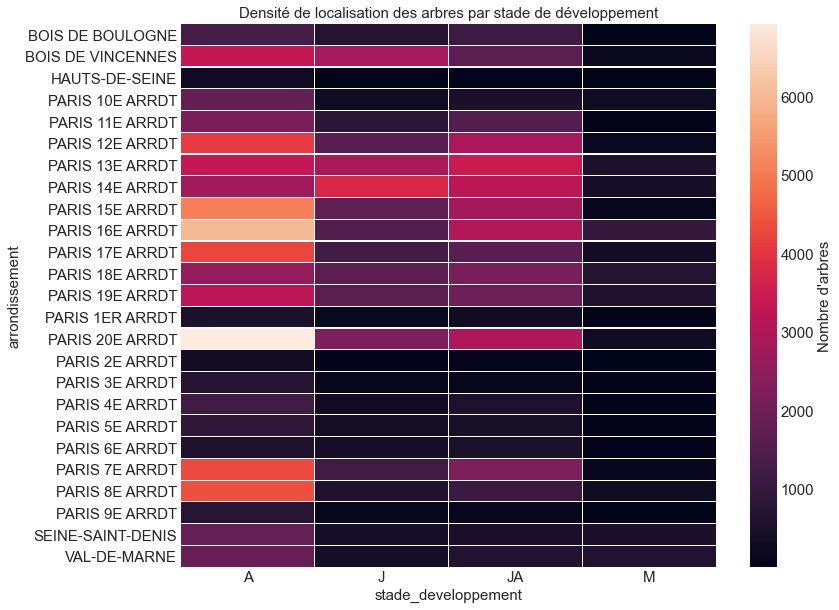

In [122]:
plt.figure(figsize=(12,10))

data_arr_by_stade =data[["arrondissement",
                         "stade_developpement"]].pivot_table(index="arrondissement",
                                                             columns="stade_developpement",aggfunc=len)


ax = sns.heatmap(data_arr_by_stade,linewidths=.1)

plt.title("Densité de localisation des arbres par stade de développement")
ax.collections[0].colorbar.set_label("Nombre d'arbres")

Grâce à cette carte de chaleur, nous avons une idée plus précise de la densité des arbres répartit par arrondissement et par stade de développement.

# Nettoyage du jeu de données

Dans cette partie, nous allons nettoyer notre jeu de données grâce à l'analyse faite précédemment. <br> Pour ce faire, il est normalement conseillé de faire des allers-retours entre l'analyse et le nettoyage, dans notre contexte nous avons d'abord fait une analyse, la plus approfondie possible, puis un nettoyage du jeu de données.<br><br>

On va commencer par retirer la colonne numéro et type_emplacement qui n'ont aucune valeur, ensuite on va retirer les valeurs aberrantes, puis retirer certaines lignes N/A puis les duplications.

In [123]:
print("Petit rappel de la forme du jeu de données avant nettoyage : ")
print("Dimensionnalité du DataFrame: ", data.shape)
data.head()

Petit rappel de la forme du jeu de données avant nettoyage : 
Dimensionnalité du DataFrame:  (200137, 18)


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [124]:
#On retire la colonne numero et type_emplacement qui n'ont aucune valeur
data_clean = data.drop(columns="numero")
data_clean = data_clean.drop(columns="type_emplacement")

print("Dimensionnalité du DataFrame: ", data_clean.shape)

Dimensionnalité du DataFrame:  (200137, 16)


In [125]:
# on met la valeur remarquable en boolean
data_clean["remarquable"] = data_clean["remarquable"].astype(bool)

On a retiré les colonnes inutiles et mis au bon format la colonne remarquable, on va maintenant retirer les lignes avec une valeur vide sur les colonnes essentielles à notre analyse. 

In [126]:
# On peut également retirer les valeurs NA pour les colonnes genre et circonference et hauteur
data_clean = data_clean[data_clean.genre.notna()]
data_clean = data_clean[data_clean.circonference_cm.notna()]
data_clean = data_clean[data_clean.hauteur_m.notna()]
# on peut retirer également la ligne d'oublie sur la domanialite
data_clean = data_clean[data_clean.domanialite.notna()]

print("Dimensionnalité du DataFrame: ", data_clean.shape)

Dimensionnalité du DataFrame:  (200120, 16)


In [127]:
# on retire mainteannt les valeurs aberrantes sur la circonference et la hauteur
data_clean = data_clean[data_clean.hauteur_m <= 35]
data_clean = data_clean[data_clean.circonference_cm <= 600]
data_clean = data_clean[data_clean.hauteur_m != 0]
data_clean = data_clean[data_clean.circonference_cm != 0]
print("Dimensionnalité du DataFrame: ", data_clean.shape)

Dimensionnalité du DataFrame:  (159958, 16)


On voit après avoir retiré les valeurs considérées comme aberrantes et les valeurs vides qu'il ne reste que **160 000 valeurs**.
> J'ai pris le choix de ne pas vérifier les outliers au-dessus des 35m de hauteur et 600cm circonférence. Il est possible d'affiner bien plus et d'avoir un jeu de données plus conséquent avec des valeurs plus atypiques qu'actuellement.

Après ce nettoyage, on va analyser les duplications de valeur géographique.

In [128]:
# on retire les valeurs dupliquées des geo_point ( le mieux serait de faire le tri selon l'analyse faite dans la première partie)
# on pourrait par exemple mixer les valeurs manquantes (et faire la moyenne des valeurs existantes)
same_geo = data_clean[data_clean.duplicated(['geo_point_2d_a','geo_point_2d_b'],keep=False)]
same_geo


,id,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
12794,115338,Jardin,PARIS 19E ARRDT,NaN,VOIE DF19,1,Peuplier,Populus,nigra,NaN,120,20,NaN,True,48.900332,2.386441
12795,115339,Jardin,PARIS 19E ARRDT,NaN,VOIE DF19,2,Peuplier,Populus,nigra,NaN,100,20,NaN,True,48.900290,2.386442
12796,115340,Jardin,PARIS 19E ARRDT,NaN,VOIE DF19,3,Peuplier,Populus,nigra,NaN,165,20,NaN,True,48.900253,2.386444
76385,195525,PERIPHERIQUE,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19001,Peuplier,Populus,nigra,Italica',120,20,NaN,True,48.900332,2.386441
76386,195526,PERIPHERIQUE,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19002,Peuplier,Populus,nigra,Italica',100,20,NaN,True,48.900290,2.386442
76387,195527,PERIPHERIQUE,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19003,Peuplier,Populus,nigra,Italica',165,20,NaN,True,48.900253,2.386444
188269,2010572,Jardin,BOIS DE VINCENNES,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20012,Platane,Platanus,x hispanica,NaN,195,18,A,False,48.839118,2.438810
188304,2010609,Jardin,BOIS DE VINCENNES,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20023,Platane,Platanus,x hispanica,NaN,190,24,A,False,48.839118,2.438810


On voit ici que les 6 premières valeurs sont dans le cas d'une mise à jour de domanialité, on peut donc considérer la valeur la plus récente (ID) comme étant la bonne. Pour les 2 dernières valeurs, il n'est pas nécessaire de modifier ces valeurs.

In [129]:
same_geo = same_geo[same_geo.stade_developpement.isna()]
same_geo = same_geo[same_geo.domanialite == "Jardin"]
data_clean = data_clean.drop(index=same_geo.index)
data_clean.head()

,id,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,False,48.857620,2.320962
1,99875,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,True,48.857656,2.321031
2,99876,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,True,48.857705,2.321061
3,99877,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,True,48.857722,2.321006
7,99881,Jardin,PARIS 16E ARRDT,NaN,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,35,Platane,Platanus,x hispanica,NaN,260,17,NaN,True,48.876722,2.280222


Le jeu de données est plus propre pour des analyses basées sur les dimensions de l'arbre, son genre ou encore son emplacement (par géoposition).<br><br>
<p style="color:blue">On pourrait également si le besoin se fait ressentir re formater les valeurs de domanialités (tout Capitalize ou Lower Case par exemple), re formater le contenu de la colonne variété en supprimant les apostrophes voir même supprimer la colonne. <br>
On pourrait également créer un formalisme pour la colonne id_emplacement si nécessaire, actuellement il est difficile de comprendre son utilité, même si cela permet tout de même d'identifier les arbres dans certains cas ( Géoposition identique par exemple).</p><br><br>
On pourrait encore ajuster les données en supprimant les valeurs vides sur la colonne remarquable si le besoin de l'analyse se porte sur cette colonne par exemple. <br><br>

Le nettoyage du jeu de données se base principalement sur le besoin. Dans notre contexte, **lors de l'entretien, il est important de savoir : le genre de l'arbre, son emplacement, sa domanialité, ses dimensions et son stade de développement(optionnel si on a ces dimensions, mais intéressant)**.

# Synthèse analyse de données

L'analyse de données est une partie importante dans tout processus lié à la "Data", cette tâche est chronophage mais importante.<br>
Ici nous avons réalisé une analyse exploratoire qui permet d'avoir une vision globale des données, on peut pousser bien plus loin cette analyse, en regardant les corrélations par espèce d'arbre, par arrondissement, etc.<br>
Bien que partielle, cette analyse nous donnes énormément d'informations sur le jeu de données, on peut par exemple trouver les emplacements géographiques des arbres comme dans l'exemple ci-dessous, ainsi que de multiple informations sur ces caractéristiques.<br><br>
On pourrait pousser l'analyse bien plus en profondeur en mettant en corrélation plusieurs autres valeurs que celle déjà effectuées, et même ajouter une autre dimension en intégrant de l'IA.

In [130]:
map = folium.Map(location=[48.850, 2.390], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map)

MAX_DATA = 1000

def format_data(row):
    output = ""
    output = output + "- lieu : " + str(row['lieu'])
    output = output + " - type : " + str(row['libelle_francais'])
    output = output + " - genre : " + str(row['genre'])
    output = output + " - espece : " + str(row['espece'])
    output = output + " - variete : " + str(row['variete'])
    output = output + " - circonference cm : " + str(row['circonference_cm'])
    output = output + " - hauteur mètre : " + str(row['hauteur_m'])
    output = output + " - stade_developpement : " + str(row['stade_developpement'])
    return output

for i in range(0,MAX_DATA):
    folium.Marker(
        location=[data_clean.iloc[i]["geo_point_2d_a"],data_clean.iloc[i]["geo_point_2d_b"]],
        popup=format_data(data_clean.iloc[i])
        ).add_to(marker_cluster)
    
map

In [131]:
map = folium.Map(location=[48.850, 2.390], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map)


def format_data(row):
    output = ""
    output = output + "- lieu : " + str(row['lieu'])
    output = output + " - type : " + str(row['libelle_francais'])
    output = output + " - genre : " + str(row['genre'])
    output = output + " - espece : " + str(row['espece'])
    output = output + " - variete : " + str(row['variete'])
    output = output + " - circonference cm : " + str(row['circonference_cm'])
    output = output + " - hauteur mètre : " + str(row['hauteur_m'])
    output = output + " - stade_developpement : " + str(row['stade_developpement'])
    return output


# décommenter pour créer le document :

#for i in range(0,len(data_clean)):
#    folium.Marker(
#        location=[data_clean.iloc[i]["geo_point_2d_a"],data_clean.iloc[i]["geo_point_2d_b"]],
#        popup=format_data(data_clean.iloc[i])
#        ).add_to(marker_cluster)
#    
#map.save("clean_data_map.html")

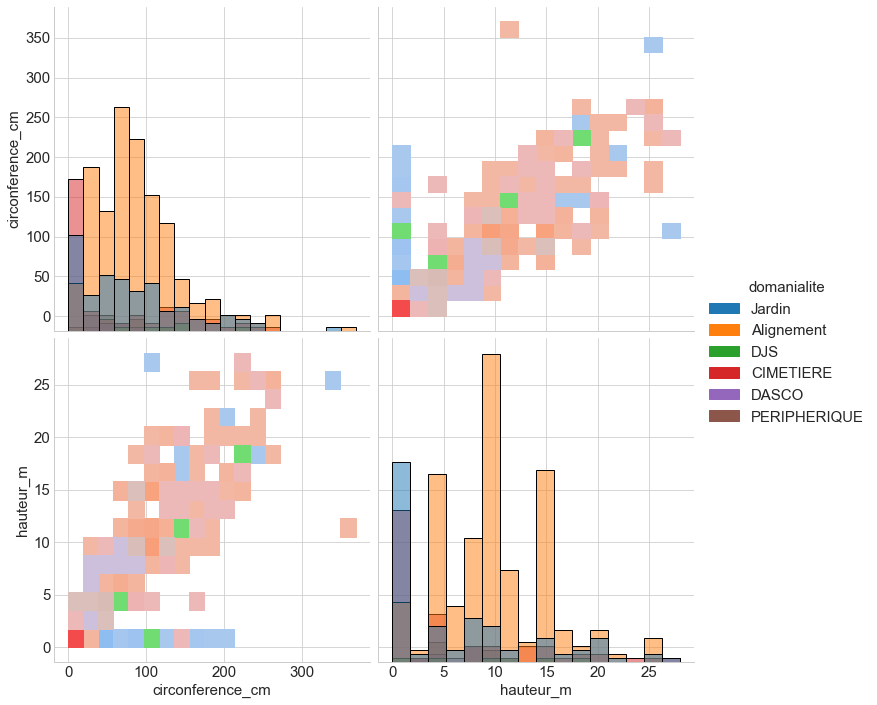

In [132]:
# Pour aller plus loin, exemple
sns.pairplot(data.sample(500), vars=['circonference_cm', 'hauteur_m'],
             hue="domanialite",
             kind="hist",
             height=5)